### Data Gathering, Enrichening, Wrangling
This notebook involves using the OMDB API to fetch data and the steps used to wrangle the data into a suitable format for modelling.<br>
Added 6 Categorical columns Rated, Language, Country, Major_Awards, Metascore_binned, Box_office_binned to the data.

In [1]:
''' To Do
1. Add more data from IMDB database.(Gross, language, )


Fetching more data from OMDB API
apikey=2be1b857<br>
Example Request :  http://www.omdbapi.com/?i=tt3896198&apikey=2be1b857
Returns JSON

Action Plan:
1. Load your ratings csv and get all IMDB ids
2. using urllib.request urlopen to fetch/get data from OMDB API
3. Using JSON module to actually parse this data.
4. Add/Merge/Join/Concatenate back to original Dataframe.
'''

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import json
from urllib.request import urlopen

API_Key_OMDB = '2be1b857'

# Lets first read the existing csv to grab the film ids

data_exist = pd.read_csv('Data/imdb_ratings_april_2020.csv', engine='python', index_col=0)

# filtering just films using .loc indexer
film_filter = (data_exist['Title Type'] == 'movie')

# Film data
data_film = data_exist.loc[film_filter]

# Lets get the IMDB film IDs in a list

index_interest = data_film.index.to_list()



In [80]:

# Creating url request for the API with movie IDs in the form http://www.omdbapi.com/?i=<IMDB ID>&apikey=2be1b857
# Using urlopen.read to fetch the JSON

# Write a function that just gets the dictionary keys from JSON and creates a DF
def create_df(API_Key_OMDB):
    '''
    Takes in OMDB key and creates empty dataframe with the required columns taken from json keys
    :param index_interest:
    :return:
    '''
    with urlopen('http://www.omdbapi.com/?i=tt3896198&apikey=' + API_Key_OMDB) as response:
        # fetching the JSON string for item
        source = response.read()
        # loading json string as a python dictionary
        data = json.loads(source)
        new_df = pd.DataFrame.from_dict(data, orient = 'columns')
        new_df.drop([0,1,2], axis = 0 , inplace = True)
        return new_df


empty_df = create_df(API_Key_OMDB)

In [81]:

# Function that adds to this dataframe details of all movies in index_interest

def fetch_data(df, list_IDS, API_Key_OMDB, number_of_threads = 5):
    ''' For some reason a few of the JSONs for a few of the movie Ids are creating more than one row.
    Later drop all rows with index greater than 1.
    Adding Multithreading to speed-up process.
    '''
    for i, item in enumerate(list_IDS):
        with urlopen('http://www.omdbapi.com/?i=' + item + '&apikey=' + API_Key_OMDB) as response:
            # fetching the JSON string for item
            source = response.read()
            # loading json string as a python dictionary
            data = json.loads(source)
            add_df = pd.DataFrame.from_dict(data)
            print(len(add_df))
            #add_df.drop([1,2], axis = 0 , inplace = True)
            df = pd.concat([df,add_df])
    return df


complete_df = fetch_data(empty_df, index_interest, API_Key_OMDB)

3
3
3
2
3
2
3
3
3
3
2
3
3
1
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
1
3
3
1
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
1
1
3
3
1
3
3
3
3
3
3
3
3
1
3
2
3
3
1
3
3
1
2
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
1
3
3
1
3
3
3
3
1
2
3
3
3
3
3
3
3
1
3
3
3
3
2
3
3
3
3
3
3
3
3
1
3
3
3
3
2
3
3
3
3
3
2
3
2
3
2
3
3
3
3
3
2
3
3
3
3
3
3
2
3
3
3
3
3
3
1
2
3
3
3
3
3
3
3
2
3
3
3
3
2
3
3
2
3
3
1
3
3
2
3
2
3
2
3
3
3
1
3
3
3
1
3
3
2
1
3
3
3
3
2
2
2
2
3
3
3
3
3
3
3
2
3
2
3
3
2
3
2
3
2
1
3
3
3
2
3
3
3
2
3
3
3
3
2
3
2
3
2
3
2
2
2
2
2
3
1
3
3
1
3
3
2
3
2
2
2
3
2
3
1
3
2
3
3
3
2
1
2
2
3
3
3
2
3
3
3
3
2
2
3
3
3
2
3
3
2
2
3
3
3
3
2
3
3
3
2
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
1
3
1
3
3
3
3
3
2
3
3


## Multi-Threaded Approach - Broken

TO DO:
0. Problem - The threads are fetching data fine, problem in concatenating them together. Tried passing a DF to them and concat to that, empty dictioanry and concat to that. All problematic. Final df/dict empty.

1. For mult-threading, updating same DF with different threads would be a problem, use dummy Dfs and concat. 
2. Need two Functions, one driver and one actual task, modify func below for actual task.
3. Create a driver func that calls this func for threads. 

In [76]:

# Function that adds to this dataframe details of all movies in index_interest

def fetch_data_range(list_IDS, API_Key_OMDB, store_df):
    ''' For some reason a few of the JSONs for a few of the movie Ids are creating more than one row.
    Later drop all rows with index greater than 1.
    Adding Multithreading to speed-up process.
    '''
    df = create_df(API_Key_OMDB)
    for i, item in enumerate(list_IDS):
        with urlopen('http://www.omdbapi.com/?i=' + item + '&apikey=' + API_Key_OMDB) as response:
            # fetching the JSON string for item
            source = response.read()
            # loading json string as a python dictionary
            data = json.loads(source)
            add_df = pd.DataFrame.from_dict(data)
            print(len(add_df))
            #add_df.drop([1,2], axis = 0 , inplace = True)
            df = pd.concat([df,add_df])
    # saving into another df
    store_df = pd.concat([store_df,df])
    return store_df

In [75]:
from threading import Thread


def threaded_fetch_data_range(list_IDS,API_Key_OMDB, num_threads = 5):
    '''Driver function for multi-threated API calls. 
    Takes in the list of IDS, API key, number of threads and creates a unique list of ids for each thread
    and dispatches threads
    '''
    store_df =create_df(API_Key_OMDB)
    threads = []
    #create the threads using num_threads as a stride.(equally dividing the list)
    for i in range(num_threads):
        ids = list_IDS[i::num_threads]
        # thread with target function and arguments passed
        t = Thread(target=fetch_data_range, args = (ids, API_Key_OMDB, store_df))
        threads.append(t)
    
    # starting the threads using list comprehension
    [t.start() for t in threads]
    # wait for the threads to finish
    [t.join() for t in threads]
    return store_df

In [77]:
s = threaded_fetch_data_range(index_interest, API_Key_OMDB)

2
33

3
3
3
3
3
1
3
33
3

3
2
33

3
3
2
3
3
3
3
3
3
3
3
3
2
3
3
3
1
3
3
3
3
3
3
3
1
3
3
1
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
1
3
1
3
3
3
2
3
3
1
3
3
3
3
3
2
3
1
3
33

3
1
1
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
3
3
3
3
1
1
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
2
3
3
3
3
3
2
3
33

3
33

1
3
3
3
2
3
3
1
3
3
3
3
3
3
3
3
3
3
2
2
3
3
2
2
3
3
2
1
3
3
3
2
2
2
3
3
3
1
3
3
3
3
3
3
3
1
2
3
3
2
3
2
3
3
32

1
3
3
3
3
2
2
2
2
2
2
1
33

3
3


Exception in thread Thread-121:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1239, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1285, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1234, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 9

3
3
3
3
3
3
2
2
3
2
2
3
1
3
3
3
3
2
2
2
3
3
3
2
2
2
3
3
2
3
2
2
3
1
2
2
3
3
3
3
3
2
3
3
3
2
3
3
2
3
3
3
1
3
3
3
2
2
3
3
3
3


KeyboardInterrupt: 

### Removing Duplicates 

In [82]:
# Removing Duplicates 
distinct_df = complete_df.loc[complete_df.index < 1]

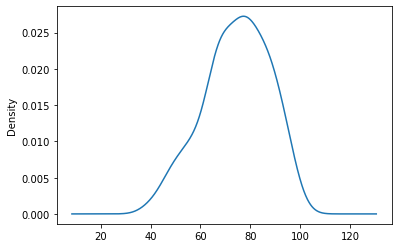

In [84]:
complete_df.loc[complete_df.index < 1].Metascore.replace('N/A', np.nan).astype(float).plot(kind = 'kde')

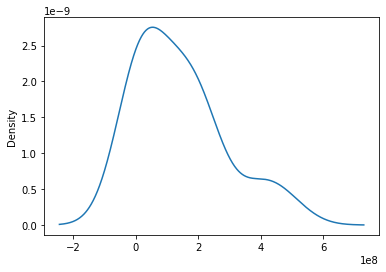

In [87]:
complete_df.loc[complete_df.index < 1].BoxOffice.replace('N/A', np.nan).str.replace('$','').str.replace(',','').astype(float).plot(kind = 'kde')

In [88]:
distinct_df.set_index('imdbID', drop=True, inplace=True)

In [89]:
### Save this DF returned by API

distinct_df.to_csv('Data/Film_data_from_OMDB_API.csv')

#### All columns are Objects

In [90]:
distinct_df.head(2)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response
imdbID,,,,,,,,,,,,,,,,,,,,,,,,
tt1010048,Slumdog Millionaire,2008,R,25 Dec 2008,120 min,"Drama, Romance","Danny Boyle, Loveleen Tandan(co-director)","Simon Beaufoy (screenplay), Vikas Swarup (novel)","Dev Patel, Saurabh Shukla, Anil Kapoor, Raj Zu...",A Mumbai teenager reflects on his life after b...,"English, Hindi, French, German","UK, France, USA",Won 8 Oscars. Another 147 wins & 131 nominations.,https://m.media-amazon.com/images/M/MV5BZmNjZW...,"{'Source': 'Internet Movie Database', 'Value':...",84,8.0,"777,042",movie,N/A,N/A,N/A,N/A,True
tt1022603,500 Days of Summer,2009,PG-13,07 Aug 2009,95 min,"Comedy, Drama, Romance",Marc Webb,"Scott Neustadter, Michael H. Weber","Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,"{'Source': 'Internet Movie Database', 'Value':...",76,7.7,"459,458",movie,N/A,N/A,N/A,N/A,True


### Selecting which columns to and which to drop

1. Title, - keep for now.
2. Year of release already in data. - Drop
2. Rated could be Important - Keep (10 Features)
3. Released,Runtime, Genre- Drop
4. *Director, Writer (328 distinct), Actors (344 distinct) - Could be interesting, drop for now.
5. PLot - Sentiment Analysis on this ? later, drop for now
6. Language - Keep 
7. COuntry - keep
8. Awards - COuld get complicated in text.(keep)
9. Poster, Ratings, imdbRating, imdbVotes, type, dvd - drop
10. metascore,Boxoffice - keep
11. Production - could be interesting (108 Features) - keep
12. Website, response - Drop

In [91]:
distinct_df.drop(['Year', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot','Poster', 'Ratings', 'imdbRating', 'imdbVotes', 'Type', 'DVD', 'Website', 'Response' ], axis = 1 , inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
distinct_df.head(2)

,Title,Rated,Language,Country,Awards,Metascore,BoxOffice,Production
imdbID,,,,,,,,
tt1010048,Slumdog Millionaire,R,"English, Hindi, French, German","UK, France, USA",Won 8 Oscars. Another 147 wins & 131 nominations.,84,N/A,N/A
tt1022603,500 Days of Summer,PG-13,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,76,N/A,N/A


### Data Wrangling/ Pre-processing/ Cleaning 
Process of converting or mapping data from original raw form into another format, preparing it for further analysis.
1. Identifying and Handling missing values.
2. Data Formating.
3. Data Normalization(centering and scaling).
4. Data bining.
5. Turning categorical values into numerical values.

### Rated Column
lets have everything in 4 columns:
1. Younguns (G) - G
2. teens(T) - PG, pg 13
3. Mature(M) - M, Tv-MA
4. Unrated/Missing(NA) - Most Not Rated movies are Indian Movies. Keep NA(better would be to get Indian Ratings and replace with corresponding)

In [93]:
len(distinct_df['Rated'].unique())

10

In [125]:
distinct_df['Rated'].value_counts()

R            121
PG-13         80
Not Rated     63
PG            41
G             17
N/A           14
TV-MA          6
Passed         1
Unrated        1
Approved       1
Name: Rated, dtype: int64

### Languages :
1. More than One language = Multilingual/Foreign
2. Single language keep as is
3. Problem is many foreign films with a bit of english etc. also get grouped here.

In [95]:
#distinct_df['Rated'].replace('TV-MA', 'R', inplace = True)

In [96]:
distinct_df.loc[(~distinct_df['Language'].isin(['English','Hindi'])), ['Language']]  = 'Multilingual/Foreign'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Country Column
1. Lets split the countries and expand column. (first column has 16 features, keep these)
2. Keep only two cols, remove rest,
3. Add these two cols back up to see how many combinations we're left with.(50, too many)

In [116]:
distinct_df[['Country', 'Country1']] = distinct_df['Country'].str.split(',', expand = True).loc[:,(0,1)]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [117]:
distinct_df.drop(['Country1'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Awards
1. If the word oscar occurs in the filed, set Bafta, emmy, oscar nominee/winner = 1, else = 0
2. Could also parse/ create bins according to how many awards nom/win, too much work, requires re.

In [119]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Oscars')), 'Major_Awards' ] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [120]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Oscar')), 'Major_Awards' ] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [121]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Golden Globe')), 'Major_Awards'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [122]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Emmy')), 'Major_Awards'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [123]:
distinct_df.loc[(distinct_df['Awards'].str.contains('BAFTA')), 'Major_Awards'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [124]:
distinct_df.loc[(distinct_df['Major_Awards'].isna()), 'Major_Awards'] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
#distinct_df.loc[distinct_df['Major_Awards'] == 0, ['Title','Metascore']].sort_values(by = 'Metascore', ascending = False).head(100)

#### Metascore (Binning)
1. Important Metric of critic praise.
2. Multiple missing values, what do ?
3. Lets bin the scores, >75 - high, >50 - mid > 25 Low, unknown - N/A

In [126]:
distinct_df['Metascore'].isin(['N/A']).value_counts()

False    262
True      83
Name: Metascore, dtype: int64

In [127]:
distinct_df.Metascore.replace('N/A', '0', inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [128]:
distinct_df.Metascore = distinct_df.Metascore.astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [130]:
# Creating equally spaced bins

bins = np.linspace(min(distinct_df.Metascore), max(distinct_df.Metascore), 4)

In [131]:
bins = np.insert(bins,1, 1)

In [132]:
# create list of categorical values for bin names 

group_name = ['N/A','low', 'mid', 'high']

In [133]:
distinct_df['Metascore_binned'] = pd.cut(distinct_df['Metascore'], bins, labels = group_name, include_lowest=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
distinct_df.drop(['Awards', 'Metascore'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Box Office (Just US Box OFfice, Keeping for Now)
0. Almost half the data is missing.
1. Strings, split on $.
2. convert to number.
3. Bin as, Billion $500Million, 100 Million, 10 Million, 1 Million, NA

In [135]:
distinct_df['BoxOffice'].isin(['N/A']).value_counts()

True     322
False     23
Name: BoxOffice, dtype: int64

In [136]:
distinct_df['BoxOffice'] = distinct_df['BoxOffice'].str.replace('$', '')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
distinct_df['BoxOffice'] = distinct_df['BoxOffice'].str.replace(',', '')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
distinct_df['BoxOffice'].replace('N/A',  0, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [139]:
distinct_df['BoxOffice'] = distinct_df['BoxOffice'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
distinct_df['BoxOffice'].sort_values()

imdbID
tt1010048            0.0
tt5164432            0.0
tt5104604            0.0
tt0050870            0.0
tt5083738            0.0
                ...     
tt1211837    232630718.0
tt3183660    234018657.0
tt3896198    389804217.0
tt0451279    412400625.0
tt2277860    486292984.0
Name: BoxOffice, Length: 345, dtype: float64

In [141]:
# Creating equally spaced bins

bins = np.array([0.0, 1.0, 1000000.0, 10000000.0, 100000000.0, 500000000.0])

In [142]:
group_name = ['N/A','1Mil', '10Mil', '100Mil','500Mil']

In [143]:
distinct_df['Box_office_binned'] = pd.cut(distinct_df['BoxOffice'], bins, labels = group_name, include_lowest=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
distinct_df['Box_office_binned'].value_counts()

N/A       322
500Mil     12
100Mil      5
1Mil        4
10Mil       2
Name: Box_office_binned, dtype: int64

In [145]:
distinct_df.drop(['BoxOffice'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Production House
80 missing values and 107 studios, too many, drop for now.

In [146]:
distinct_df['Production'].value_counts()

N/A                                         293
Warner Bros. Pictures                         8
20th Century Fox                              3
Universal Pictures                            3
Walt Disney Pictures                          2
Paramount Pictures                            2
Big Mouth Productions                         1
RSVP Movies                                   1
Roadside Attractions                          1
Eros Entertainment                            1
Warner Bros. Pictures/Legendary Pictures      1
Sony Pictures Classics                        1
ZEE Studios International                     1
NEON                                          1
Tandav Film Entertainment                     1
Lionsgate                                     1
A24                                           1
Rupam Chitra                                  1
Liongate Films                                1
Viva Entertainment                            1
Sony Pictures                           

### Saving Final DF

In [147]:
distinct_df.drop(['Title', 'Production'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
distinct_df.head(2)

,Rated,Language,Country,Major_Awards,Metascore_binned,Box_office_binned
imdbID,,,,,,
tt1010048,R,Multilingual/Foreign,UK,1.0,high,N/A
tt1022603,PG-13,Multilingual/Foreign,USA,1.0,high,N/A


In [149]:
distinct_df.to_csv('Data/wrangled_Film_data_from_OMDB_API.csv')

## Merging with existing dataframe and Saving

In [151]:
data_film = pd.concat([data_film, distinct_df], axis = 1)

In [155]:
data_film.Box_office_binned.value_counts()

N/A       322
500Mil     12
100Mil      5
1Mil        4
10Mil       2
Name: Box_office_binned, dtype: int64

In [156]:
data_film.to_csv('Data/enriched_film_data_april.csv')